In [1]:
from MDP import MountainCar, CartPole
from RLAlgorithms import ESGNStepSARSA, TrueOnlineSARSALambda
import matplotlib.pyplot as plt
import numpy as np

  2%|▏         | 38/2000 [00:00<00:05, 373.43it/s]

M: 2


  2%|▏         | 38/2000 [00:00<00:05, 376.42it/s]

M: 3


  3%|▎         | 61/2000 [00:00<00:06, 303.80it/s]

M: 5


  2%|▏         | 47/2000 [00:00<00:08, 236.52it/s]

M: 8


100%|██████████| 2000/2000 [00:15<00:00, 130.74it/s]


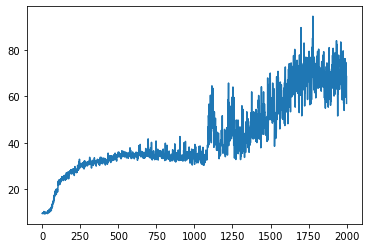

In [7]:
num_trials = 20
cp = CartPole()

for M in [2, 3, 5, 8, 10, 15][-2:]:
    
    print('M:',M)
    alg = ESGNStepSARSA(cp, M=M, n=5, alpha=0.01, epsilon=0.1, approach='epsilon-greedy')
    Gs = np.zeros(alg.num_episodes)

    for _ in range(num_trials):
        alg.reset()
        Gs += np.array(alg.run())

    Gs /= num_trials

    plt.clf()
    plt.plot(range(len(Gs)), Gs)
    plt.savefig(f'experiments/nStepSARSA/CartPole/M-{M}.png', facecolor='white')

  1%|          | 20/2000 [00:00<00:20, 96.03it/s]

epsilon: 0.2


  2%|▏         | 37/2000 [00:00<00:10, 182.56it/s]

epsilon: 0.1


  2%|▏         | 30/2000 [00:00<00:13, 145.68it/s]

epsilon: 0.05


  2%|▏         | 38/2000 [00:00<00:10, 183.28it/s]

epsilon: 0.01


  1%|          | 22/2000 [00:00<00:19, 104.07it/s]

epsilon: 0.005


  2%|▏         | 34/2000 [00:00<00:11, 167.10it/s]

epsilon: 0.001


100%|██████████| 2000/2000 [00:15<00:00, 125.72it/s]


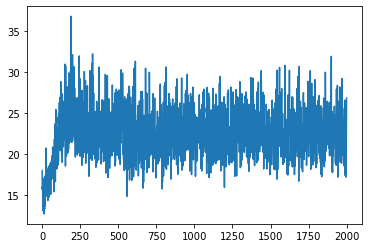

In [4]:
num_trials = 20
cp = CartPole()

for epsilon in [0.2, 0.1, 0.05, 0.01, 0.005, 0.001]:
    print('epsilon:',epsilon)
    alg = ESGNStepSARSA(cp, M=10, n=5, alpha=0.01, approach='softmax')
    Gs = np.zeros(alg.num_episodes)

    for _ in range(num_trials):
        alg.reset()
        Gs += np.array(alg.run())

    Gs /= num_trials

    plt.clf()
    plt.plot(range(len(Gs)), Gs)
    plt.savefig(f'experiments/nStepSARSA/CartPole/epsilon-{epsilon}.png', facecolor='white')

  1%|          | 24/2000 [00:00<00:16, 116.59it/s]

alpha: 0.1


  1%|▏         | 29/2000 [00:00<00:13, 147.19it/s]

alpha: 0.01


  2%|▏         | 36/2000 [00:00<00:11, 168.05it/s]

alpha: 0.001


100%|██████████| 2000/2000 [00:14<00:00, 141.02it/s]


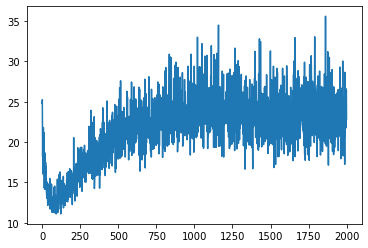

In [3]:
num_trials = 20
cp = CartPole()

for approach in ['epsilon-greedy', 'softmax'][1:]:
    for alpha in [0.1, 0.01, 0.001]:
        print('alpha:', alpha)
        alg = ESGNStepSARSA(cp, M=10, n=5, alpha=alpha, epsilon=0.1, approach=approach)
        Gs = np.zeros(alg.num_episodes)

        for _ in range(num_trials):
            alg.reset()
            Gs += np.array(alg.run())

        Gs /= num_trials

        plt.clf()
        plt.plot(range(len(Gs)), Gs)
        plt.savefig(f'experiments/nStepSARSA/CartPole/alpha-{alpha}-{approach}.png', facecolor='white')